In [1]:
import pandas as pd

# Load datasets
apps_df = pd.read_csv('apps.csv')
reviews_df = pd.read_csv('user_reviews.csv')



In [2]:
# Check data types and correct if needed
apps_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            8432 non-null   float64
 6   Installs        9659 non-null   object 
 7   Type            9659 non-null   object 
 8   Price           9659 non-null   object 
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9651 non-null   object 
 13  Android Ver     9657 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 1.0+ MB


In [3]:
# Correct data types if necessary, e.g., convert 'Installs' and 'Price' to numeric, 'Last Updated' to datetime, etc.

# Drop duplicates if any
apps_df = apps_df.drop_duplicates()



In [4]:
# Handling missing values if any
apps_df = apps_df.dropna()



In [5]:
import pandas as pd

# Assuming apps_df is your DataFrame

# Replace 'Varies with device' with NaN
apps_df['Size'] = apps_df['Size'].replace('Varies with device', None)

# Convert the 'Size' column to string
apps_df['Size'] = apps_df['Size'].astype(str)

# Remove 'M' and 'k' and convert to numeric
apps_df['Size'] = apps_df['Size'].str.replace('M', '').str.replace('k', '').astype(float)


In [6]:
# Data type conversion for 'Last Updated'
apps_df['Last Updated'] = pd.to_datetime(apps_df['Last Updated'])



In [7]:

# Clean 'Price' column
apps_df['Price'] = apps_df['Price'].apply(lambda x: 0 if x == '0' else float(x.replace('$', '')))


In [8]:

# Check the updated data types
apps_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7021 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Unnamed: 0      7021 non-null   int64         
 1   App             7021 non-null   object        
 2   Category        7021 non-null   object        
 3   Rating          7021 non-null   float64       
 4   Reviews         7021 non-null   int64         
 5   Size            7021 non-null   float64       
 6   Installs        7021 non-null   object        
 7   Type            7021 non-null   object        
 8   Price           7021 non-null   float64       
 9   Content Rating  7021 non-null   object        
 10  Genres          7021 non-null   object        
 11  Last Updated    7021 non-null   datetime64[ns]
 12  Current Ver     7021 non-null   object        
 13  Android Ver     7021 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(8)
me

<ipython-input-9-fa6b19951dea>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=apps_df['Category'].value_counts().values, y=category_order, palette='viridis')


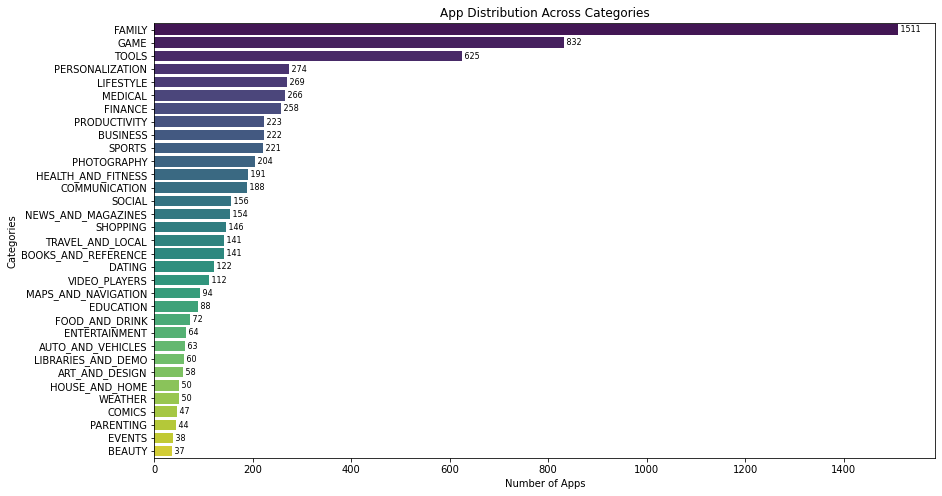

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Explore app distribution across categories
plt.figure(figsize=(14, 8))
category_order = apps_df['Category'].value_counts().index

# Create a horizontal bar chart
sns.barplot(x=apps_df['Category'].value_counts().values, y=category_order, palette='viridis')

# Add count labels on each bar
for index, value in enumerate(apps_df['Category'].value_counts().values):
    plt.text(value, index, f' {value}', va='center', fontsize=8)

plt.title('App Distribution Across Categories')
plt.xlabel('Number of Apps')
plt.ylabel('Categories')
plt.show()


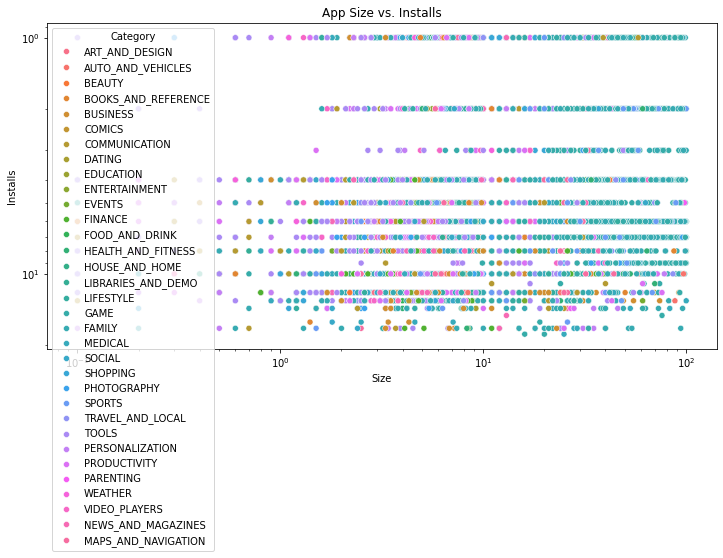

In [10]:
import plotly.express as px

# App Ratings Across Categories
fig = px.box(apps_df, x='Category', y='Rating', points='all', color='Category',
             labels={'Rating': 'App Ratings', 'Category': 'App Category'},
             title='App Ratings Across Categories')
fig.update_layout(xaxis=dict(tickangle=90), height=600, width=1200)
fig.show()

plt.figure(figsize=(12, 6))
sns.scatterplot(x='Size', y='Installs', hue='Category', data=apps_df)
plt.xscale('log')
plt.yscale('log')
plt.title('App Size vs. Installs')
plt.show()

# App Pricing Across Categories
fig = px.violin(apps_df, x='Category', y='Price', box=True, points='all', color='Category',
                labels={'Price': 'App Price', 'Category': 'App Category'},
                title='App Pricing Across Categories')
fig.update_layout(xaxis=dict(tickangle=90), height=600, width=1200)
fig.show()


<ipython-input-11-708ccf5bbe95>:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




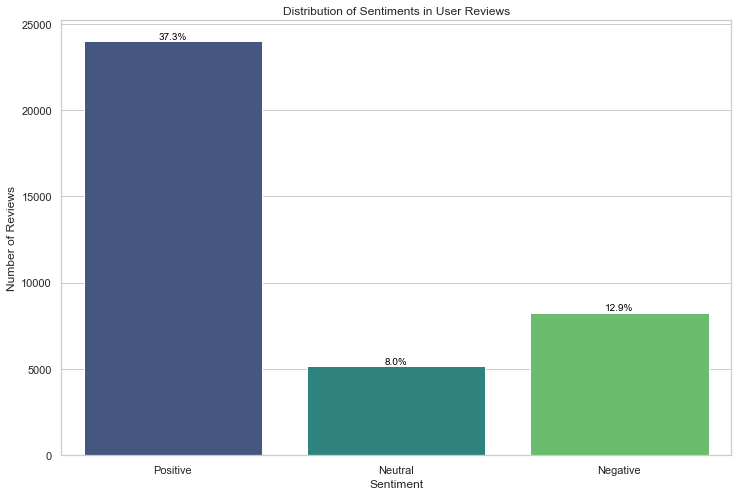

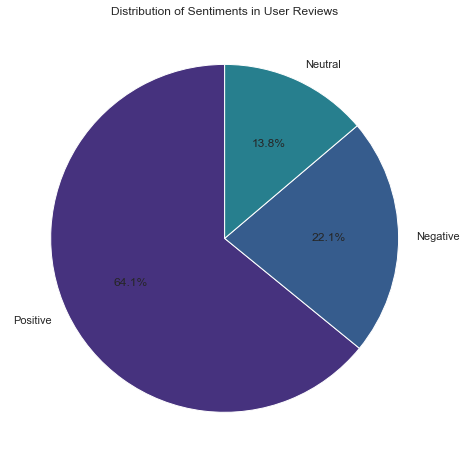

Summary Statistics for Sentiments:
count        37432
unique           3
top       Positive
freq         23998
Name: Sentiment, dtype: object


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming reviews_df is your DataFrame

# 1. Distribution of Sentiments
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")
sentiment_countplot = sns.countplot(x='Sentiment', data=reviews_df, palette='viridis')

# Add percentages on top of the bars
total_reviews = len(reviews_df)
for p in sentiment_countplot.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total_reviews)
    x_position = p.get_x() + p.get_width() / 2
    y_position = p.get_height()
    sentiment_countplot.annotate(percentage, (x_position, y_position),
                                 ha='center', va='bottom', fontsize=10, color='black')

plt.title('Distribution of Sentiments in User Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.show()

# 2. Sentiment Pie Chart
sentiment_distribution = reviews_df['Sentiment'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(sentiment_distribution, labels=sentiment_distribution.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('viridis'))
plt.title('Distribution of Sentiments in User Reviews')
plt.show()

# 3. Summary Statistics
summary_statistics = reviews_df['Sentiment'].describe()
print("Summary Statistics for Sentiments:")
print(summary_statistics)


In [12]:
import plotly.express as px

# Assuming apps_df is your DataFrame

# Interactive scatter plot for Size vs. Installs
fig = px.scatter(
    apps_df,
    x='Size',
    y='Installs',
    color='Category',
    size='Reviews',  # You can customize size based on another variable (e.g., Reviews)
    hover_name='App',  # Display app names on hover
    log_x=True,
    log_y=True,
    title='Interactive Size vs. Installs',
    labels={'Size': 'App Size (in MB)', 'Installs': 'Number of Installs'},
    template='plotly',
    marginal_x='box',  # Display box plots on the x-axis
    marginal_y='violin',  # Display violin plots on the y-axis
    facet_col='Content Rating',  # Add facetting based on Content Rating
)

# Customize layout
fig.update_layout(
    xaxis=dict(title='App Size (in MB)'),
    yaxis=dict(title='Number of Installs'),
    legend=dict(title='App Category'),
)

# Show the interactive plot
fig.show()
